LINK TO DATA: https://colab.research.google.com/drive/1e1lrcGVwTK_LVt9JGmmlN5oCDJz6IahH#scrollTo=npYFVeTry1vh&line=11&uniqifier=1

Finding if there is a correlation between the total amount of minutes played and goals & assists for forwards in the 2023-2024 season in the top 5 leagues.



Correlation coefficient: 0.8101015524402119
Strong correlation


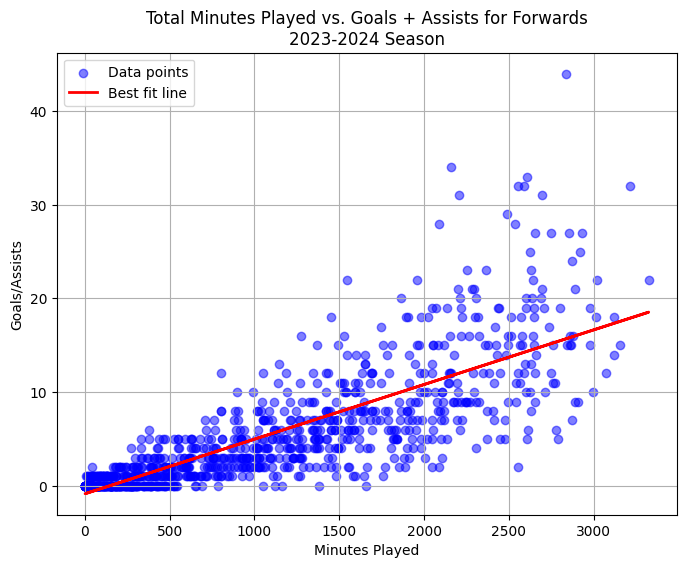

In [2]:
#correlation between the amount of goals / assists and minutes played for forwards

import csv
import matplotlib.pyplot as plt
import numpy as np

playerNames = [];
countGA = [];
minutesPlayed = [];

filePath = "/content/big_5_players_stats_2023_2024.csv"

#opening the file and scanning it
with open(filePath, "r") as file:
  scanner = csv.reader(file)
  next(scanner)  # Skip the header line

  for values in scanner:
    if len(values) > 1:
      if "FW" in values[3].split(","): #if the player is a forward / plays forward
        goals_assists = int(values[14])  # Convert goals/assists to integer
        minutes_played = int(values[10])  # Convert minutes played to integer
        playerNames.append(values[1])  # Append player name for reference

        countGA.append(goals_assists)
        minutesPlayed.append(minutes_played)

countGA = np.array(countGA)
mintuesPlayed = np.array(minutesPlayed)

#using numpy to calculate the correlation coefficient
correlationMatrix = np.corrcoef(countGA, mintuesPlayed)
correlation = correlationMatrix[0, 1]

print("Correlation coefficient:", correlation)
if(correlation > 0.75):
    print("Strong correlation")
elif(correlation > 0.50):
    print("Moderate correlation")
else:
    print("Weak correlation")


# Calculate the best fit line using polyfit (degree 1 for a linear line)
slope, intercept = np.polyfit(minutesPlayed, countGA, 1)

# Create a polynomial function for the best fit line
best_fit_line = np.poly1d([slope, intercept])

# Plotting the data
plt.figure(figsize=(8,6))
plt.scatter(minutesPlayed, countGA, color='blue', alpha=0.5, label="Data points")
plt.plot(minutesPlayed, best_fit_line(minutesPlayed), color='red', label="Best fit line", linewidth=2)
plt.title("Total Minutes Played vs. Goals + Assists for Forwards\n2023-2024 Season")
plt.xlabel("Minutes Played")
plt.ylabel("Goals/Assists")
plt.legend()
plt.grid(True)
plt.show()

The following data is from a data set that provides information on every player playing in one of the Big 5 european soccer leagues

Forward Mean goals + assists:  4.917307692307692
Midfielder Mean goals + assists:  2.4788359788359786
Defender Mean goals + assists:  1.6477541371158393
Forward Mean age:  24.139423076923077
Midfielder Mean age:  24.8505291005291
Defender Mean age:  25.541371158392433



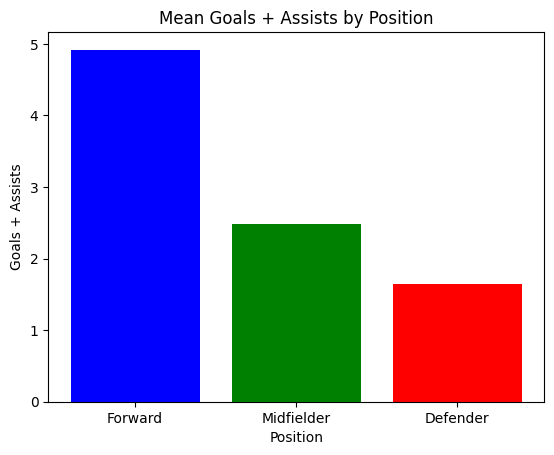

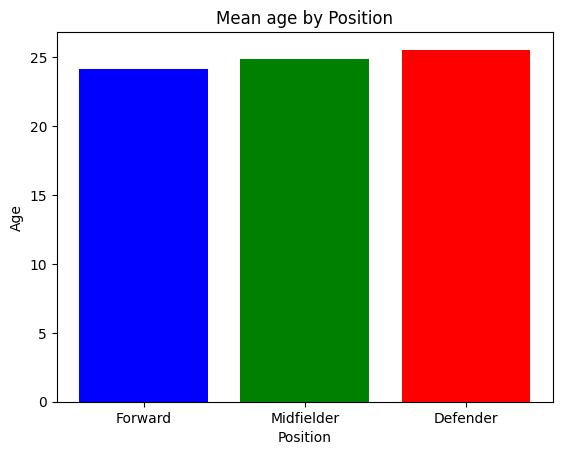

Correlation between age and goals + assists based on position:
A posoitve correlation which is close to 1, will suggest older players have higher goals + assists
A weak correlation which is close to -1, will suggest younger players have higher goals + assists
And a correlation near 0 suggests there is no relationship between age and goals + assists

FW Correlation coefficient: 0.22912766798821843
There is no linear relationship between older and younger players playing forward and their goals + assists

MF Correlation coefficient: 0.1756854272595472
There is no linear relationship between older and younger players playing midfield and their goals + assists

DF Correlation coefficient: 0.07301425197406965
There is no linear relationship between older and younger players playing defense and their goals + assists



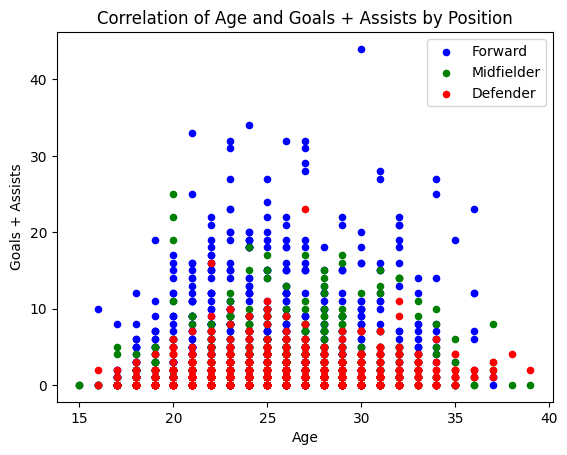

In [ ]:
#finding the avergae / mean of goals + assists by position
#Also finding the correlation between goals + assists and age (do older or younger players score / assist more )
import csv
import numpy as np
import matplotlib.pyplot as plt

playerNames = [];
countGAForward = [];
ageForward = [];
countGAMidfielder = [];
ageMidfielder = [];
countGADefender = [];
ageDefender = [];

filePath = "/content/big_5_players_stats_2023_2024.csv"

#opening the file and scanning it
with open(filePath, "r") as file:
  scanner = csv.reader(file)
  next(scanner)  # Skip the header line

  for values in scanner:
    if len(values) > 1:
      if "FW" in values[3].split(","): #if the player is a forward / plays forward
        goals_assists = int(values[14])  # Convert goals/assists to integer
        age = int(values[6])  # Convert age played to integer
        playerNames.append(values[1])  # Append player name for reference
        countGAForward.append(goals_assists)
        ageForward.append(age)

      elif "MF" in values[3].split(","): #if the player is a midfield / plays midfield
        goals_assists = int(values[14])  # Convert goals/assists to integer
        age = int(values[6])  # Convert age played to integer
        playerNames.append(values[1])  # Append player name for reference
        countGAMidfielder.append(goals_assists)
        ageMidfielder.append(age)

      elif "DF" in values[3].split(","): #if the player is a defender / plays defense
        goals_assists = int(values[14])  # Convert goals/assists to integer
        age = int(values[6])  # Convert age played to integer
        playerNames.append(values[1])  # Append player name for reference
        countGADefender.append(goals_assists)
        ageDefender.append(age)


FwGAMean = np.mean(countGAForward)
MfGAMean = np.mean(countGAMidfielder)
DfGAMean = np.mean(countGADefender)
FwAgeMean = np.mean(ageForward)
MfAgeMean = np.mean(ageMidfielder)
DfAgeMean = np.mean(ageDefender)

print("The following data is from a data set that provides information on every player playing in one of the Big 5 european soccer leagues")
print()


print("Forward Mean goals + assists: ", FwGAMean)
print("Midfielder Mean goals + assists: ", MfGAMean)
print("Defender Mean goals + assists: ", DfGAMean)
print("Forward Mean age: ", FwAgeMean)
print("Midfielder Mean age: ", MfAgeMean)
print("Defender Mean age: ", DfAgeMean)
print()
plt.bar(["Forward", "Midfielder", "Defender"], [FwGAMean, MfGAMean, DfGAMean], color=['blue', 'green', 'red'])
plt.xlabel("Position")
plt.ylabel("Goals + Assists")
plt.plot()
plt.title("Mean Goals + Assists by Position")
plt.show()
plt.show()
print()
plt.bar(["Forward", "Midfielder", "Defender"], [FwAgeMean, MfAgeMean, DfAgeMean], color=['blue', 'green', 'red'])
plt.xlabel("Position")
plt.ylabel("Age")
plt.plot()
plt.title("Mean age by Position")
plt.show()
plt.show()

#using numpy to calculate the correlation coefficient
FWcorrelationMatrix = np.corrcoef(ageForward, countGAForward)
FWcorrelation = FWcorrelationMatrix[0, 1]
MFcorrelationMatrix = np.corrcoef(ageMidfielder, countGAMidfielder)
MFcorrelation = MFcorrelationMatrix[0, 1]
DFcorrelationMatrix = np.corrcoef(ageDefender, countGADefender)
DFcorrelation = DFcorrelationMatrix[0, 1]


print("Correlation between age and goals + assists based on position:")
print("A posoitve correlation which is close to 1, will suggest older players have higher goals + assists")
print("A weak correlation which is close to -1, will suggest younger players have higher goals + assists")
print("And a correlation near 0 suggests there is no relationship between age and goals + assists")
print()

print("FW Correlation coefficient:", FWcorrelation)
if(FWcorrelation > 0.75):
    print("Older players playing forward tend to score and assist more")
elif(FWcorrelation > -.75 and FWcorrelation < .25):
    print("There is no linear relationship between older and younger players playing forward and their goals + assists")
elif(FWcorrelation < -0.75):
    print("Younger players playing forward tend to score and assist more")
else:
    print("Modertae correlation for players playing forward")

print()

print("MF Correlation coefficient:", MFcorrelation)
if(MFcorrelation > 0.75):
    print("Older players playing midfield tend to score and assist more")
elif(MFcorrelation > -.75 and MFcorrelation < .25):
    print("There is no linear relationship between older and younger players playing midfield and their goals + assists")
elif(MFcorrelation < -0.75):
    print("Younger players playing midfield tend to score and assist more")
else:
    print("Modertae correlation for players playing midfield")

print()

print("DF Correlation coefficient:", DFcorrelation)
if(DFcorrelation > 0.75):
    print("Older players playing defense tend to score and assist more")
elif(DFcorrelation > -.75 and DFcorrelation < .25):
    print("There is no linear relationship between older and younger players playing defense and their goals + assists")
elif(MFcorrelation < -0.75):
    print("Younger players playing defense tend to score and assist more")
else:
    print("Modertae correlation for players playing defense")
print()

plt.scatter(ageForward, countGAForward, color='blue', label='Forward', s=20)
plt.scatter(ageMidfielder, countGAMidfielder, color='green', label='Midfielder', s=20)
plt.scatter(ageDefender, countGADefender, color='red', label='Defender', s=20)

plt.xlabel("Age")
plt.ylabel("Goals + Assists")
plt.title("Correlation of Age and Goals + Assists by Position")
plt.legend()
plt.show()

